<a href="https://colab.research.google.com/github/ikonushok/AI-Traiding/blob/main/Calculating_Resistance_and_Pivot_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Calculating Resistance and Pivot points with Python](https://medium.com/code-for-cause/calculating-resistance-and-pivot-points-with-python-caffbad46715)

[support-and-resistance-plotting](https://github.com/hahaharsh7/support-and-resistance-plotting/blob/master/Untitled4.ipynb)

# Установка бибилиотек

In [ ]:
!pip install yfinance
import yfinance as yf # requires yfinance - pip install yfinance

In [2]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt

# Основные установки

In [3]:
# Начните с активации обходного пути Yahoo Finance и установки начальной и конечной точек фрейма данных.
# здесь Yf.pdr_override () активирует ваши условия обходного пути, а остальное установит ваш фрейм данных.
yf.pdr_override()
start = dt.datetime(2020,1, 1)
now = dt.datetime.now()
stock = 'POLY.ME'

мы собираемся использовать переменную (счетчик) для подсчета до 5, и это потому, что, когда мы смотрим на биржевую диаграмму, мы хотим определить локальный максимум, и что касается меня, я бы рекомендовал использовать период в 10 дней, поэтому мы хотим

a, чтобы найти запас, который является локальным максимумом в течение этих 10 дней.

Таким образом, нужно 5 дней до левого и 5 дней после вправо, так мы охарактеризуем опорную точку.

поэтому создадим массив с именем Range, в котором мы будем хранить все наши 10 периодов дней и их значения.

Мы также создадим массив с именем daterange, в котором будут храниться даты для них.

поэтому каждый день мы будем добавлять новую дату и избавляться от предыдущего значения, чтобы мы могли продолжать вращать даты и двигаться вперед по диаграмме.

мы начнем с запуска цикла, нахождения текущего максимума массива и добавления этих значений в массив диапазона.

Теперь, если текущее максимальное значение является максимальным значением в массиве, счетчик добавит 1, а если нет, счетчик будет установлен на ноль и будет искать новый максимум.

нам нужен еще один оператор if, чтобы проверить, была ли найдена точка поворота, поэтому, если счетчик == 5, последняя точка поворота станет новой точкой поворота, поскольку все 5 точек до и после нее ниже ее

In [4]:
df = pdr.get_data_yahoo(stock,
                        start,
                        now,
                        interval = '1h') # interval=60min is not supported. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2020-01-03 09:30:00+03:00,978.400024,980.000000,967.099976,976.200012,976.200012,0
2020-01-03 10:30:00+03:00,976.000000,984.599976,973.099976,982.500000,982.500000,38902
2020-01-03 11:30:00+03:00,983.000000,983.099976,980.299988,981.200012,981.200012,15860
2020-01-03 12:30:00+03:00,981.700012,984.000000,980.200012,982.200012,982.200012,19444
2020-01-03 13:30:00+03:00,983.000000,988.599976,982.799988,986.400024,986.400024,30210
...,...,...,...,...,...,...
2021-05-26 10:30:00+03:00,1780.599976,1796.000000,1780.400024,1789.900024,1789.900024,215933
2021-05-26 11:30:00+03:00,1789.599976,1797.300049,1784.300049,1785.500000,1785.500000,209258
2021-05-26 12:30:00+03:00,1785.099976,1794.000000,1785.000000,1790.099976,1790.099976,160115
2021-05-26 13:30:00+03:00,1790.199951,1790.400024,1789.000000,1789.099976,1789.099976,22892


# RESISTANCE

In [17]:
#while stock != 'quit':
def RESISTANCE(counter_lvl, interval = '1d'):
    plt.figure(figsize=(22, 8))

    df = pdr.get_data_yahoo(stock,
                            start,
                            now,
                            interval = interval) # interval=60min is not supported. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
    df['High'].plot(label='high')
        
    pivots =[]
    dates = []
    counter = 0
    lastPivot = 0
    Range = [0,0,0,0,0,0,0,0,0,0]
    daterange = [0,0,0,0,0,0,0,0,0,0]
        
    for i in df.index:
        currentMax = max(Range , default=0)
        value=round(df["High"][i],2)
            
        Range=Range[1:9]
        Range.append(value)
        daterange=daterange[1:9]
        daterange.append(i)
            
        if currentMax == max(Range , default=0):
            counter+=1
        else:
            counter = 0
        if counter ==  counter_lvl:
            lastPivot = currentMax
            dateloc = Range.index(lastPivot)
            lastDate = daterange[dateloc]
            pivots.append(lastPivot)
            dates.append(lastDate)
    print()
    #print(str(pivots))
    #print(str(dates))
    timeD = dt.timedelta(days=100)
        
        
    for index in range(1, len(pivots)):
        print(str(pivots[index]) + " :" + str(dates[index]))
            
        plt.plot_date([dates[index], dates[index] + timeD],
            [pivots[index], pivots[index]] , linestyle='solid' , linewidth=1, marker=',')
        
    plt.show()

[*********************100%***********************]  1 of 1 completed

1016.1 :2020-01-08 09:30:00+03:00
990.0 :2020-01-13 09:30:00+03:00
991.2 :2020-01-13 18:30:00+03:00
1006.0 :2020-01-16 11:30:00+03:00
1005.4 :2020-01-17 10:30:00+03:00
1017.9 :2020-01-21 10:30:00+03:00
1044.0 :2020-01-23 10:30:00+03:00
1037.8 :2020-01-24 09:30:00+03:00
1051.5 :2020-01-27 17:30:00+03:00
1116.8 :2020-02-03 09:30:00+03:00
1073.1 :2020-02-10 09:30:00+03:00
1073.8 :2020-02-11 17:30:00+03:00
1057.5 :2020-02-14 09:30:00+03:00
1098.9 :2020-02-19 14:30:00+03:00
1175.0 :2020-02-25 09:30:00+03:00
1133.9 :2020-02-27 09:30:00+03:00
1265.4 :2020-03-10 10:30:00+03:00
1161.8 :2020-03-16 09:30:00+03:00
1067.6 :2020-03-18 10:30:00+03:00
1166.3 :2020-03-23 09:30:00+03:00
1265.0 :2020-03-25 14:30:00+03:00
1398.7 :2020-03-31 09:30:00+03:00
1370.9 :2020-04-01 11:30:00+03:00
1343.5 :2020-04-02 17:30:00+03:00
1348.0 :2020-04-07 09:30:00+03:00
1414.7 :2020-04-10 09:30:00+03:00
1517.0 :2020-04-14 15:30:00+03:00
1496.0 :2020-0

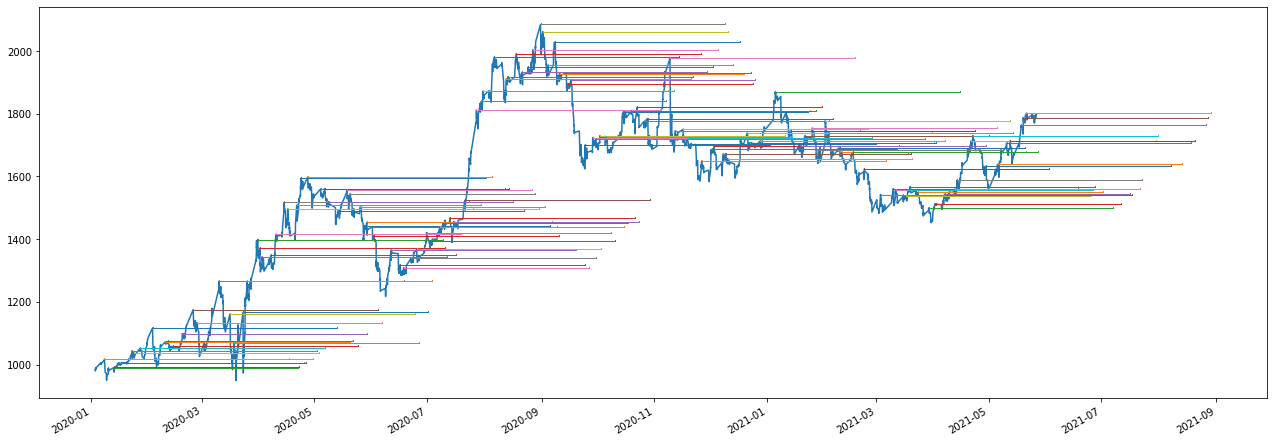

In [19]:
RESISTANCE(counter_lvl = 8, interval = '1h')

[*********************100%***********************]  1 of 1 completed

1116.8 :2020-02-03 00:00:00
1265.4 :2020-03-10 00:00:00
1597.8 :2020-04-27 00:00:00
2084.5 :2020-08-31 00:00:00
1819.8 :2020-10-22 00:00:00
1979.1 :2020-11-09 00:00:00
1869.8 :2021-01-05 00:00:00
1778.0 :2021-02-01 00:00:00
1567.7 :2021-03-19 00:00:00
1730.0 :2021-04-22 00:00:00


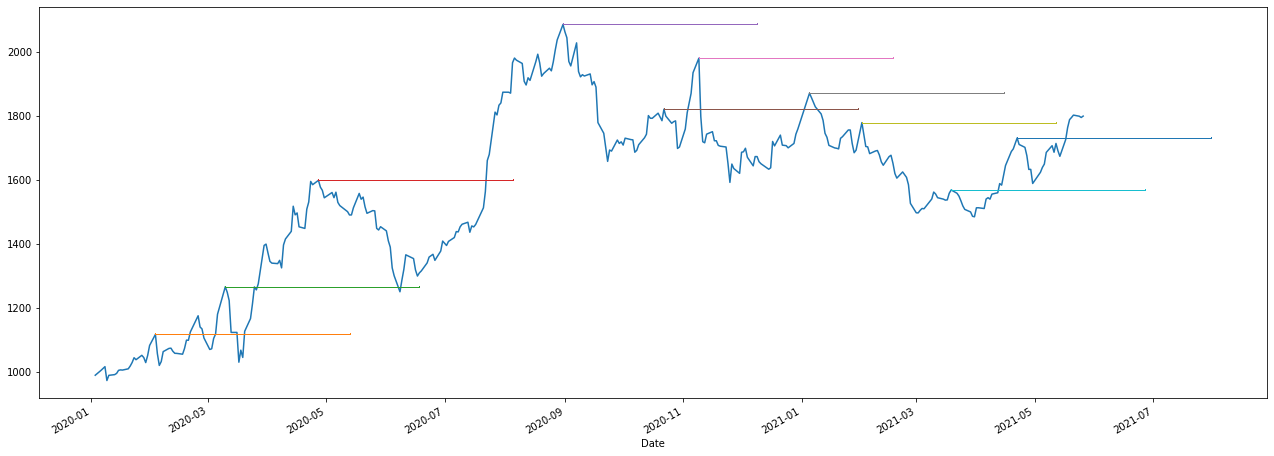

In [18]:
RESISTANCE(counter_lvl = 8, interval = '1d')

# SUPPORT

In [20]:
#while stock != 'quit':
#counter_lvl = 2

def SUPPORT(counter_lvl, interval = '1d'):
    plt.figure(figsize=(22, 8))

    df = pdr.get_data_yahoo(stock,
                            start,
                            now,
                            interval = interval) # interval=60min is not supported. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
    df['Low'].plot(label='low')
        
    pivots =[]
    dates = []
    counter = 0
    lastPivot = 0
    Range = [0,0,0,0,0,0,0,0,0,0]
    daterange = [0,0,0,0,0,0,0,0,0,0]
        
    for i in df.index:
        currentMax = min(Range , default=0)
        value=round(df["Low"][i], 2)
            
        Range=Range[1:9]
        Range.append(value)
        daterange=daterange[1:9]
        daterange.append(i)
            
        if currentMax == min(Range , default=0):
            counter+=1
        else:
            counter = 0
        if counter ==  counter_lvl:
            lastPivot=currentMax
            dateloc =Range.index(lastPivot)
            lastDate = daterange[dateloc]
            pivots.append(lastPivot)
            dates.append(lastDate)
    print()
    #print(str(pivots))
    #print(str(dates))
    timeD = dt.timedelta(days=100)
        
        
    for index in range(1, len(pivots)):
        print(str(pivots[index]) + " :" +str(dates[index]))
            
        plt.plot_date([dates[index], dates[index] + timeD],
            [pivots[index],pivots[index]] , linestyle='-' , linewidth = 2, marker=',')
        
    plt.show()

[*********************100%***********************]  1 of 1 completed

984.1 :2020-02-05 00:00:00
980.1 :2020-02-28 00:00:00
907.3 :2020-03-17 00:00:00
1428.5 :2020-05-12 00:00:00
1210.7 :2020-06-08 00:00:00
1200.0 :2020-06-29 00:00:00
1792.1 :2020-08-12 00:00:00
1592.2 :2020-09-24 00:00:00
1658.8 :2020-10-08 00:00:00
1533.3 :2020-10-28 00:00:00
1567.0 :2020-11-30 00:00:00
1590.0 :2020-12-14 00:00:00
1618.0 :2021-01-28 00:00:00
1465.1 :2021-03-04 00:00:00
1445.5 :2021-03-30 00:00:00
1552.4 :2021-04-30 00:00:00


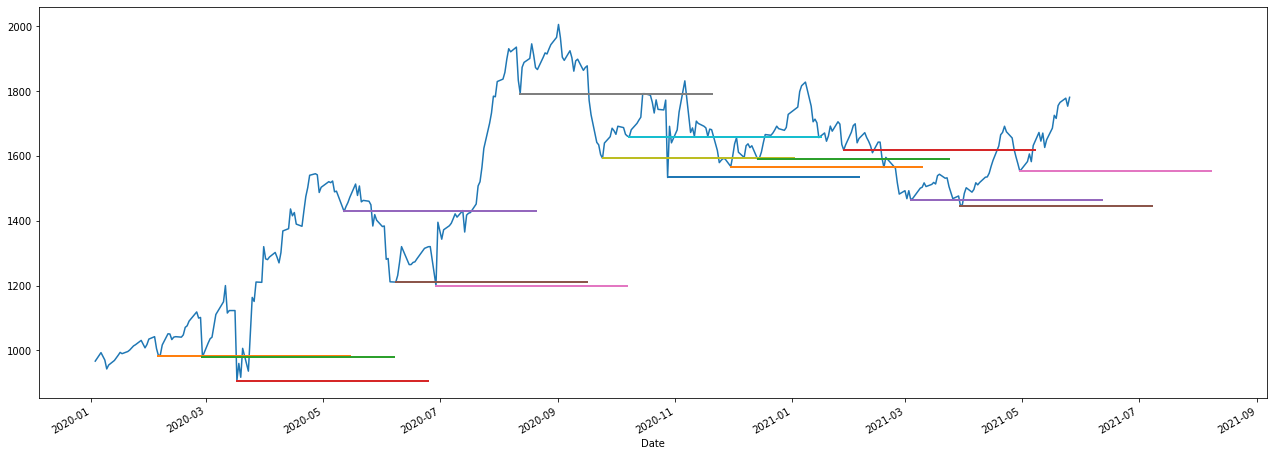

In [23]:
SUPPORT(counter_lvl = 8, interval = '1d')

[*********************100%***********************]  1 of 1 completed

943.0 :2020-01-09 00:00:00
984.1 :2020-02-05 00:00:00
1033.5 :2020-02-12 00:00:00
980.1 :2020-02-28 00:00:00
907.3 :2020-03-17 00:00:00
1270.0 :2020-04-08 00:00:00
1382.8 :2020-04-20 00:00:00
1487.0 :2020-04-29 00:00:00
1428.5 :2020-05-12 00:00:00
1383.6 :2020-05-27 00:00:00
1210.7 :2020-06-08 00:00:00
1264.7 :2020-06-15 00:00:00
1200.0 :2020-06-29 00:00:00
1365.1 :2020-07-14 00:00:00
1792.1 :2020-08-12 00:00:00
1866.0 :2020-08-21 00:00:00
1894.3 :2020-09-04 00:00:00
1861.0 :2020-09-09 00:00:00
1592.2 :2020-09-24 00:00:00
1658.8 :2020-10-08 00:00:00
1533.3 :2020-10-28 00:00:00
1660.0 :2020-11-11 00:00:00
1579.0 :2020-11-24 00:00:00
1567.0 :2020-11-30 00:00:00
1590.0 :2020-12-14 00:00:00
1678.6 :2020-12-28 00:00:00
1645.0 :2021-01-19 00:00:00
1618.0 :2021-01-28 00:00:00
1609.5 :2021-02-12 00:00:00
1564.0 :2021-02-18 00:00:00
1465.1 :2021-03-04 00:00:00
1445.5 :2021-03-30 00:00:00
1552.4 :2021-04-30 00:00:00
1582.0 :20

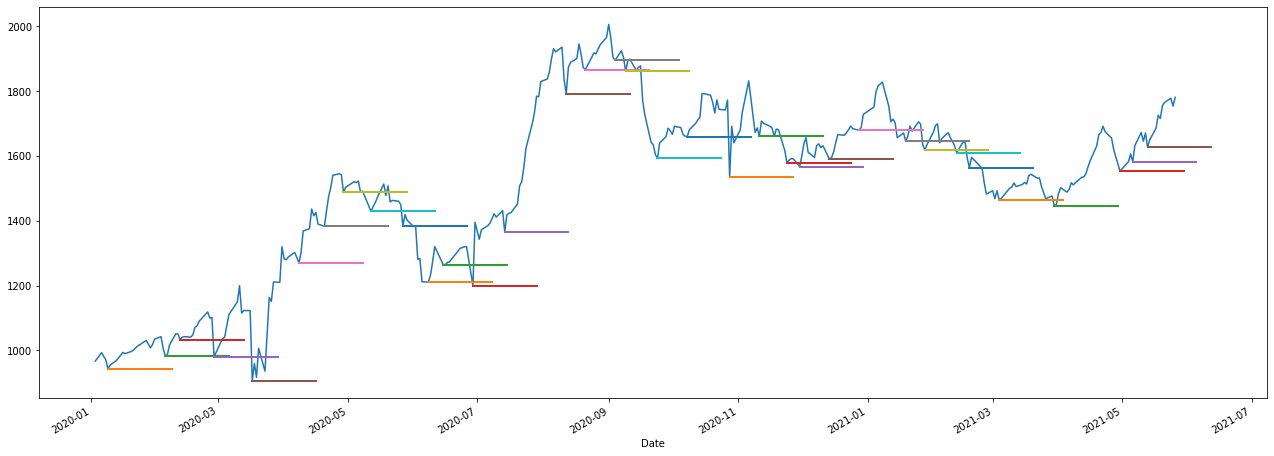

In [10]:
SUPPORT(counter_lvl = 2, interval = '1d')